# Monte carlo simulation 

Gist: we have a data set already we have figured out how are the independent variables distributed we have created n numbers of look allike data points using distributions and then findind the dependent variable , Now we have a bunch of dependent variable we are taking the normal distribution of that and predicting the possible range  

importing the libraries 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# line of rough codes to understand the concept

# The norm.rvs method is used to generate a set of datapoint which upon ploting gives a normal distribution 

In [17]:
norm.rvs(1,0.1,10).round(2)

array([0.95, 0.95, 0.99, 1.05, 1.05, 1.07, 0.91, 1.15, 1.05, 0.9 ])

we are taking 1 and not 100 for easy calculation 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

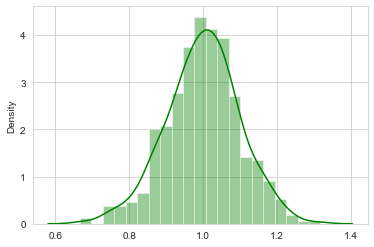

In [25]:
# lets check if it actually produces the normal distribution set of numbers 
sns.distplot(norm.rvs(1,0.1,500),color = 'green')

In [ ]:
#the argument of the above method is 
norm.rvs(mean,std_deviation,reps)
# the mean is the value around which our random variables are generated with the given std( how close/far the datapoints are 
# spread)

# What does the np.random.choice do here in this notebook 

To understand this lets consider that you have a coin and there is a 50% chance of geting head and 50% chance of getting tail lets assume you tossed it 10 times how would the outcomes look like so by using the np.random.choice we can get the entire event 

In [36]:
toss = ('H','T')
prob = (.5,.5)
np.random.choice(toss,10,p = prob)

array(['T', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'H'], dtype='<U1')

In [38]:
# lets do for the dice as well
roll = (1,2,3,4,5,6)
prob_d =(1/6,1/6,1/6,1/6,1/6,1/6)
np.random.choice(roll,10,p = prob_d)

array([3, 6, 5, 2, 4, 4, 1, 4, 3, 4])

arguments of np.random.choice is 

np.random.choice(sample_space,no_of_trials,p = probability_of_each_event)

# lets start

We alread have the data of sales, target,incentives etc  of only last year 

we are supposed to calculate what should be the budget for the next year 

There are certain thing which we have been given,

It has been found out that the target variable follows a normal distribution curve

we have the data points of the complete sales target which is around 100 percent

lets create a normal distribution of that data first 

In [18]:
sales_achived_percent=norm.rvs(1,0.1,500).round(2)
sales_achived_percent

array([0.93, 1.03, 0.82, 0.91, 1.07, 1.11, 1.  , 1.01, 1.09, 0.86, 0.96,
       0.87, 0.9 , 1.12, 1.  , 0.87, 0.96, 1.08, 0.83, 1.14, 0.92, 1.14,
       0.92, 1.  , 1.21, 0.89, 1.01, 0.94, 0.85, 0.96, 1.07, 0.89, 0.78,
       0.94, 1.06, 1.18, 1.  , 1.03, 1.03, 0.94, 1.01, 0.92, 1.08, 1.09,
       0.97, 1.  , 1.08, 1.06, 0.98, 0.93, 0.86, 0.96, 0.87, 0.98, 0.99,
       1.11, 1.04, 0.97, 0.88, 0.99, 0.91, 0.89, 1.01, 0.95, 1.04, 1.14,
       0.98, 0.94, 1.17, 1.03, 0.88, 0.97, 1.11, 0.9 , 1.08, 0.95, 1.06,
       1.02, 1.11, 0.89, 1.03, 0.93, 0.9 , 0.96, 0.95, 0.86, 1.03, 1.06,
       1.21, 1.11, 1.09, 0.97, 1.11, 0.97, 0.94, 1.1 , 1.1 , 1.03, 1.09,
       0.93, 0.94, 1.14, 1.01, 1.07, 1.15, 1.13, 0.99, 1.  , 1.17, 0.94,
       0.97, 1.01, 1.05, 1.01, 0.95, 0.96, 0.88, 1.13, 0.91, 0.94, 1.04,
       1.16, 0.95, 1.04, 1.  , 0.99, 1.  , 1.05, 0.94, 0.98, 0.93, 0.94,
       1.05, 0.85, 1.07, 1.09, 0.99, 0.8 , 0.96, 1.24, 1.03, 0.86, 1.02,
       1.05, 1.05, 1.04, 1.11, 1.02, 0.9 , 0.91, 1.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

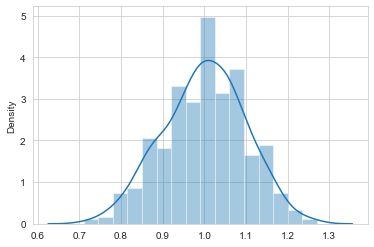

In [47]:
sns.distplot(sales_targets)

So consider the the data which we have is of one universe and lets created the similar data for other universe and then take the incentive budget of every universe and then predict a range 

Now we are also given the sales target and we know the probability of the assiging sales target lets use np.random.choice to sample this datapoints 

In [15]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target=np.random.choice(sales_target_values,500,p = sales_target_prob)

In [16]:
sales_target

array([100000, 100000,  75000, 100000,  75000, 300000, 200000, 200000,
       100000, 200000, 100000, 100000, 100000, 200000, 200000,  75000,
       200000, 200000,  75000,  75000, 200000,  75000,  75000, 200000,
       500000,  75000,  75000,  75000, 200000, 200000,  75000, 100000,
        75000, 200000, 100000,  75000, 200000,  75000, 200000,  75000,
        75000, 100000,  75000, 200000,  75000, 300000,  75000, 100000,
       100000, 100000, 100000,  75000, 100000, 500000,  75000, 100000,
       100000, 300000, 400000,  75000, 100000,  75000,  75000, 100000,
       100000, 500000, 100000, 200000, 100000, 200000, 500000, 100000,
       200000,  75000,  75000, 100000, 100000, 100000, 200000, 200000,
       100000, 400000,  75000, 200000, 300000,  75000, 500000, 300000,
       200000, 500000, 200000, 100000,  75000, 400000,  75000,  75000,
        75000, 300000, 100000, 400000,  75000, 100000, 200000,  75000,
        75000, 100000, 200000, 200000, 100000, 200000, 200000,  75000,
      

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

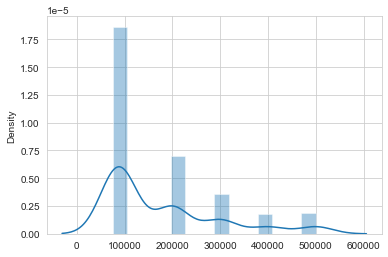

In [58]:
sns.distplot(sales_target)

so it kind of gives likewise distribution 

In [64]:
l = [1,2,3,4]
pd.DataFrame(l,index = range(len(l)),columns = ['check'])

,check
0,1
1,2
2,3
3,4


Now we will have to create a data frame then we will have to calculate the incentives and we have to do this for every simulation 

In [20]:
df = pd.DataFrame({'Sales_target':sales_target,'Percent_to_plan':sales_achived_percent})

In [22]:
df.Percent_to_plan = df.Percent_to_plan*100

In [25]:
df['Actual_sales'] = df['Sales_target']*df['Percent_to_plan']

In [26]:
df

,Sales_target,Percent_to_plan,Actual_sales
0,100000,93.0,9300000.0
1,100000,103.0,10300000.0
2,75000,82.0,6150000.0
3,100000,91.0,9100000.0
4,75000,107.0,8025000.0
...,...,...,...
495,100000,97.0,9700000.0
496,100000,100.0,10000000.0
497,400000,88.0,35200000.0
498,75000,80.0,6000000.0


In [27]:
def comission_rate(a):
    if 0 <= a <= 90:
        return 2
    elif 91 <= a <= 99:
        return 3
    else:
        return 4

In [32]:
df['Commission_rate']=df.apply(lambda x: comission_rate(x['Percent_to_plan']), axis = 1)

In [34]:
df['Commission_amount'] = df['Commission_rate']*df['Actual_sales']

In [35]:
df

,Sales_target,Percent_to_plan,Actual_sales,Commission_rate,Commission_amount
0,100000,93.0,9300000.0,3,27900000.0
1,100000,103.0,10300000.0,4,41200000.0
2,75000,82.0,6150000.0,2,12300000.0
3,100000,91.0,9100000.0,3,27300000.0
4,75000,107.0,8025000.0,4,32100000.0
...,...,...,...,...,...
495,100000,97.0,9700000.0,3,29100000.0
496,100000,100.0,10000000.0,4,40000000.0
497,400000,88.0,35200000.0,2,70400000.0
498,75000,80.0,6000000.0,2,12000000.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Commission_amount', ylabel='Density'>

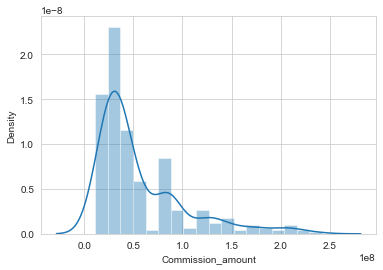

In [36]:
sns.distplot(df['Commission_amount'])

In [41]:
for i in range(2):
    percent_to_plan=norm.rvs(1,0.1,500)
    sales_target = np.
    

In [ ]:
# continued 